In [71]:
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

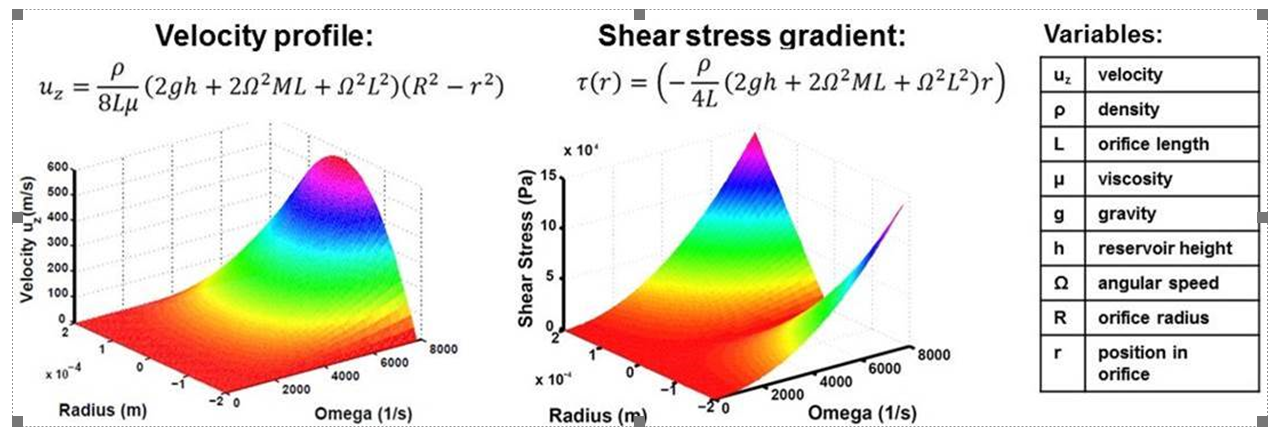

In [97]:
L=0.0075
h=0.01
R=200e-6
rho=1400
mu=0.1
g=9.8
OmegaMax=8000.
M=0.008

z1=[]
z2=[]
counter=0
z1=np.zeros([201,201])
z2=np.zeros([201,201])
x = np.linspace(0, OmegaMax, 100)
y = np.linspace(-R, R, 100)

for oi in range(len(x)):
    for ri in range(len(y)):
        omega=x[oi]
        r=y[ri]
        z1[ri,oi]=(rho/(8*L*mu))*(2*g*h+2*omega**2*M*L+omega**2*L**2)*(R**2-r**2)
        z2[ri,oi]=abs((-rho/(4*L))*(2*g*h+2*omega**2*M*L+omega**2*L**2)*r)



In [113]:

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]])
# adding surfaces to subplots.
fig.add_trace(go.Surface(x=list(x), y=list(y), z=z1, colorscale='Viridis',showscale=True,
                        colorbar=dict(len=0.75, x=0.40)),row=1,col=1)
fig.add_trace(go.Surface(x=list(x), y=list(y), z=z2, colorscale='Viridis',showscale=True,
                        colorbar=dict(len=0.75, x=0.95)),row=1,col=2)
#fig.add_trace(go.Surface(x=x, y=y, z=z2, colorscale='Viridis', showscale=True))
fig.update_layout(template='plotly_white')
#noaxis=dict(showbackground=False,showline=True,zeroline=True,showgrid=True,showticklabels=False,title='')

zoom=1.4
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=-1.25*zoom, y=-1.25*zoom, z=1.25*zoom)
)

fig.update_layout(
    scene1=dict(camera=camera,#the default values are 1.25, 1.25, 1.25
           yaxis=dict(title="",showline=True,zeroline=True,showgrid=True,showticklabels=True,
                     tickvals=[-0.0002,-0.0001,0,0.0001,0.0002],ticktext=["-R","-R/2","0","R/2","R"]),
           xaxis=dict(title=u"\u03A9",showline=True,zeroline=True,showgrid=True,showticklabels=True,
                     tickvals=[0,2000,4000,6000,8000]),
           zaxis=dict(title="Velocity u<sub>z</sub> (m/s)",showline=True,zeroline=True,showgrid=True,
                      showticklabels=True,tickvals=[20,40,60,80,100])),
    scene2=dict(camera=camera,#the default values are 1.25, 1.25, 1.25
           yaxis=dict(title="",showline=True,zeroline=True,showgrid=True,showticklabels=True,
                     tickvals=[-0.0002,-0.0001,0,0.0001,0.0002],ticktext=["-R","-R/2","0","R/2","R"]),
           xaxis=dict(title=u"\u03A9",showline=True,zeroline=True,showgrid=True,showticklabels=True,
                     tickvals=[0,2000,4000,6000,8000]),
           zaxis=dict(title="Shear Stress (Pa)",showline=True,zeroline=True,showgrid=True,
                      showticklabels=True,tickvals=[20000,40000,60000,80000,100000])))
fig.show()
fig.write_image("Image.png",width=1100, height=600, scale=2)